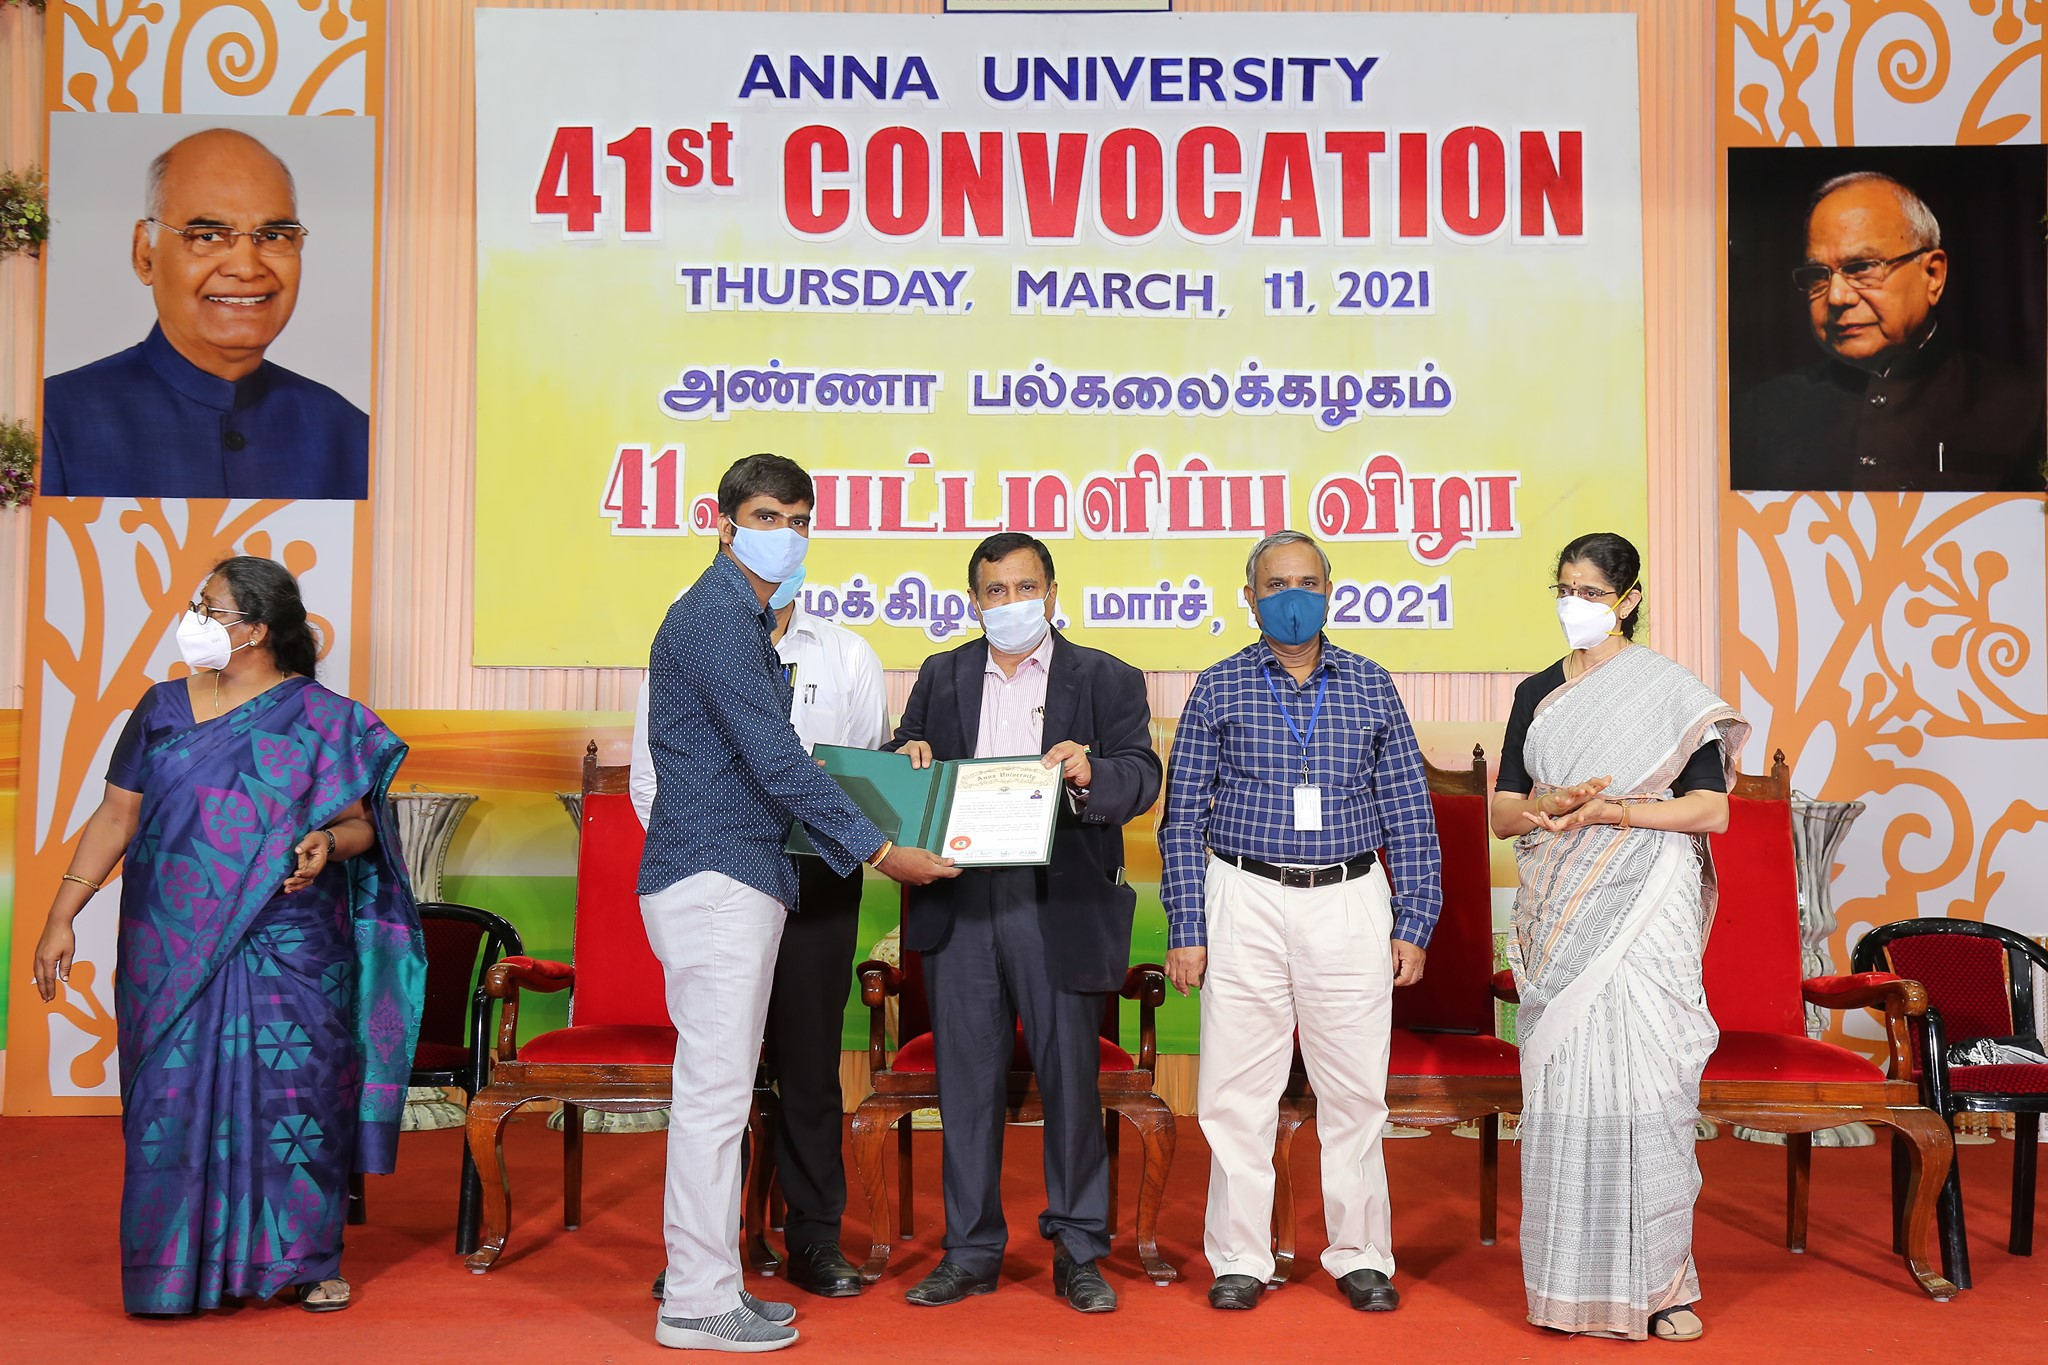

In [1]:
import torch
from transformers import AutoProcessor, AutoModelForVision2Seq
import torch
from transformers import AutoProcessor, AutoModelForVision2Seq
from PIL import Image
import requests
from io import BytesIO

# Load Image (Local or URL)
image_path = "img.jpg"  # Change to your image path
image = Image.open(image_path).convert("RGB")  # Load from local file
image

In [15]:


# Initialize processor and model
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-500M-Instruct")
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceTB/SmolVLM-500M-Instruct",
    torch_dtype=torch.bfloat16,
    _attn_implementation="eager"  # Disable FlashAttention if not installed
).to(DEVICE)

# Conversation history
messages = [
    {"role": "user", "content": [{"type": "image"}]}  # Image as context
]

print("\nChatbot is ready! Type 'exit' to stop.\n")

while True:
    user_question = input("You: ")
    if user_question.lower() == "exit":
        print("Conversation ended.")
        break

    # Add user question to conversation history
    messages.append({"role": "user", "content": [{"type": "text", "text": user_question}]})

    # Preprocess input
    prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(text=prompt, images=[image], return_tensors="pt").to(DEVICE)

    # Generate response
    generated_ids = model.generate(
        **inputs, 
        max_new_tokens=300,  # Limit token length
        repetition_penalty=1.2,  # Reduce repetition
        no_repeat_ngram_size=3,  # Prevent 3-word repetitions
        temperature=0.7,  # Balance randomness
        top_p=0.9  # Nucleus sampling
    )

    # Decode and print response
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(f"Bot: {generated_text.strip()}\n")

    # Add response to conversation history
    messages.append({"role": "assistant", "content": [{"type": "text", "text": generated_text.strip()}]})



Chatbot is ready! Type 'exit' to stop.



You:  how many male faces are visible in this image


Bot: User:




User: how many male faces are visible in this image
Assistant: Two.



You:  how many male faces are visible in this image with the mask


Bot: User:




User: how many male faces are visible in this image
Assistant: User:




User: how many male faces are visible in this image
Assistant: Two.
User: how many male faces are visible in this image with the mask
Assistant: Four.



You:  Who is the tallest in this image


Bot: User:




User: how many male faces are visible in this image
Assistant: User:




User: how many male faces are visible in this image
Assistant: Two.
User: how many male faces are visible in this image with the mask
Assistant: User:




User: how many male faces are visible in this image
Assistant: User:




User: how many male faces are visible in this image
Assistant: Two.
User: how many male faces are visible in this image with the mask
Assistant: Four.
User: Who is the tallest in this image
Assistant: The woman on right.



You:  exit


Conversation ended.
